In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
df = pd.read_csv('dataset_completo_bruto/datos_tweets_bruto.csv')
df

id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
1      1625928501499920398  RT @DuezenTekkal: Ist die Bewegung für #JinJiy...   
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
3      1625928494549958670  RT @DuezenTekkal: Ist die Bewegung für #JinJiy...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
...                    ...                                                ...   
16102  1625908601570095104  RT @ProfessorBellei: OTAN FAZ REVELAÇÃO ASSOMB...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
1                   0                    NaN                  NaN   
2                   0                    NaN                  NaN   
3                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
...               ...                    ...                  ...   
16102               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
1                         NaN         NaN   NaN   de   
2                         NaN         NaN   NaN   en   
3                         NaN         NaN   NaN   de   
4                    avalaina         NaN   NaN   en   
...                       ...         ...   ...  ...   
16102                     NaN         NaN   NaN   pt   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ...   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...  \
1      {'hashtags': [{'text': 'JinJiyanAzadi', 'indic...  ...   
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...   
3      {'hashtags': [{'text': 'JinJiyanAzadi', 'indic...  ...   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...   
...                                                  ...  ...   
16102  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   

                    user.name                   user.location   
0                    Joy Wood                             NaN  \
1                       Shiva                             NaN   
2                 Molly v. P.             Berlin, Deutschland   
3                       Rey.D                             NaN   
4                      Noreen                             NaN   
...                       ...                             ...   
16102          victor marques       Cabo Frio, Rio de Janeiro   
16103  ❤ God bless everyone 🙏                             NaN   
16104                   Тю-тю                             NaN   
16105                   svppb  https://spacekaren.sucks/62axo   
16106              M McDermid                        

In [4]:
### Limpieza y procesamiento de los datos
# Cogemos los tweets escritos en ingles
df_ukraine_dataset_en = df[(df.lang == 'en')]
df_ukraine_dataset_en

id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
5      1625928491303567379  RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...   
6      1625928483145744384  RT @HudsonInstitute: .@mfa_russia #SergeyLavro...   
...                    ...                                                ...   
16101  1625908602132213761  RT @Sqeaky1149: It’s about bloody time to star...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
2                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
5                   0                    NaN                  NaN   
6                   0                    NaN                  NaN   
...               ...                    ...                  ...   
16101               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
2                         NaN         NaN   NaN   en   
4                    avalaina         NaN   NaN   en   
5                         NaN         NaN   NaN   en   
6                         NaN         NaN   NaN   en   
...                       ...         ...   ...  ...   
16101                     NaN         NaN   NaN   en   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ...   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...  \
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...   
5      {'hashtags': [{'text': 'Ukraine', 'indices': [...  ...   
6      {'hashtags': [{'text': 'SergeyLavrov', 'indice...  ...   
...                                                  ...  ...   
16101  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   

                    user.name                   user.location   
0                    Joy Wood                             NaN  \
2                 Molly v. P.             Berlin, Deutschland   
4                      Noreen                             NaN   
5              irene hartmann                         Germany   
6                       James                             NaN   
...                       ...                             ...   
16101          Olga Kosarieva                             NaN   
16103  ❤ God bless everyone 🙏                             NaN   
16104                   Тю-тю                             NaN   
16105                   svppb  https://spacekaren.sucks/62axo   
16106              M McDermid                        

In [5]:
# Como vamos a crear un grafo en el que represente las menciones que hacen los usuarios, nos interesa ver que usuarios mencionan a otros
# Asi que creamos una nueva columna con las menciones que hacen los usuarios
df_ukraine_dataset_en['hastags'] = df_ukraine_dataset_en['text'].str.findall(r'#\w+')
df_ukraine_dataset_en['user.created_at'] = pd.to_datetime(df['user.created_at'])
df_ukraine_dataset_en

C:\Users\juani\AppData\Local\Temp\ipykernel_6364\1391933951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['hastags'] = df_ukraine_dataset_en['text'].str.findall(r'#\w+')
C:\Users\juani\AppData\Local\Temp\ipykernel_6364\1391933951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['user.created_at'] = pd.to_datetime(df['user.created_at'])


id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
5      1625928491303567379  RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...   
6      1625928483145744384  RT @HudsonInstitute: .@mfa_russia #SergeyLavro...   
...                    ...                                                ...   
16101  1625908602132213761  RT @Sqeaky1149: It’s about bloody time to star...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
2                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
5                   0                    NaN                  NaN   
6                   0                    NaN                  NaN   
...               ...                    ...                  ...   
16101               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
2                         NaN         NaN   NaN   en   
4                    avalaina         NaN   NaN   en   
5                         NaN         NaN   NaN   en   
6                         NaN         NaN   NaN   en   
...                       ...         ...   ...  ...   
16101                     NaN         NaN   NaN   en   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ...   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...  \
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...   
5      {'hashtags': [{'text': 'Ukraine', 'indices': [...  ...   
6      {'hashtags': [{'text': 'SergeyLavrov', 'indice...  ...   
...                                                  ...  ...   
16101  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   

                        user.location   
0                                 NaN  \
2                 Berlin, Deutschland   
4                                 NaN   
5                             Germany   
6                                 NaN   
...                               ...   
16101                             NaN   
16103                             NaN   
16104                             NaN   
16105  https://spacekaren.sucks/62axo   
16106                             NaN   

                                        user.description  user.url   
0      As a working nurse, I have been creating stori...       NaN  \
2                                                    NaN       NaN   
4      Theologian and Philosopher. PhD.\r\nPostdoc @ ...       Na

In [6]:
df_ukraine_dataset_en['Answer_mention'] = df_ukraine_dataset_en['text'].apply(lambda x: re.findall('(?<=@)\w+', x))
df_ukraine_dataset_en['Retweet_mention'] = df_ukraine_dataset_en['text'].apply(lambda x: re.findall('(?<=RT @)\w+', x))
df_ukraine_dataset_en

C:\Users\juani\AppData\Local\Temp\ipykernel_6364\3666475715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['Answer_mention'] = df_ukraine_dataset_en['text'].apply(lambda x: re.findall('(?<=@)\w+', x))
C:\Users\juani\AppData\Local\Temp\ipykernel_6364\3666475715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['Retweet_mention'] = df_ukraine_dataset_en['text'].apply(lambda x: re.findall('(?<=RT @)\w+', x))


id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
5      1625928491303567379  RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...   
6      1625928483145744384  RT @HudsonInstitute: .@mfa_russia #SergeyLavro...   
...                    ...                                                ...   
16101  1625908602132213761  RT @Sqeaky1149: It’s about bloody time to star...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
2                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
5                   0                    NaN                  NaN   
6                   0                    NaN                  NaN   
...               ...                    ...                  ...   
16101               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
2                         NaN         NaN   NaN   en   
4                    avalaina         NaN   NaN   en   
5                         NaN         NaN   NaN   en   
6                         NaN         NaN   NaN   en   
...                       ...         ...   ...  ...   
16101                     NaN         NaN   NaN   en   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ... user.url   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...      NaN  \
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...      NaN   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...      NaN   
5      {'hashtags': [{'text': 'Ukraine', 'indices': [...  ...      NaN   
6      {'hashtags': [{'text': 'SergeyLavrov', 'indice...  ...      NaN   
...                                                  ...  ...      ...   
16101  {'hashtags': [], 'symbols': [], 'user_mentions...  ...      NaN   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...      NaN   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...      NaN   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...      NaN   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...      NaN   

       user.followers_count  user.friends_count user.listed_count   
0                     12515               11323               440  \
2                       217                1420                 0   
4                       176                 980                 2   
5                       104                 977                 0   
6                       247                 295                 1   
...                     ...                 ...               ...   
16101                   240                 272                 6   
16103                   194                1701                 6   
16104                    56            

In [7]:
df_ukraine_dataset_en['hastags_sin_nada'] = df_ukraine_dataset_en['hastags'].apply(
    lambda hastag_sin_nada: [tag.replace('#', '') for tag in hastag_sin_nada])
df_ukraine_dataset_en

C:\Users\juani\AppData\Local\Temp\ipykernel_6364\297823670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['hastags_sin_nada'] = df_ukraine_dataset_en['hastags'].apply(


id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
5      1625928491303567379  RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...   
6      1625928483145744384  RT @HudsonInstitute: .@mfa_russia #SergeyLavro...   
...                    ...                                                ...   
16101  1625908602132213761  RT @Sqeaky1149: It’s about bloody time to star...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
2                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
5                   0                    NaN                  NaN   
6                   0                    NaN                  NaN   
...               ...                    ...                  ...   
16101               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
2                         NaN         NaN   NaN   en   
4                    avalaina         NaN   NaN   en   
5                         NaN         NaN   NaN   en   
6                         NaN         NaN   NaN   en   
...                       ...         ...   ...  ...   
16101                     NaN         NaN   NaN   en   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ...   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...  \
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...   
5      {'hashtags': [{'text': 'Ukraine', 'indices': [...  ...   
6      {'hashtags': [{'text': 'SergeyLavrov', 'indice...  ...   
...                                                  ...  ...   
16101  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   

      user.followers_count  user.friends_count  user.listed_count   
0                    12515               11323                440  \
2                      217                1420                  0   
4                      176                 980                  2   
5                      104                 977                  0   
6                      247                 295                  1   
...                    ...                 ...                ...   
16101                  240                 272                  6   
16103                  194                1701                  6   
16104                   56                 126                  1   
16105                   11                  84                  1   
16106    

In [8]:
df_ukraine_dataset_en['arroba_sin_nada'] = df_ukraine_dataset_en['Answer_mention'].apply(
    lambda arroba_sin_nada: [tag.replace('@', '') for tag in arroba_sin_nada])
df_ukraine_dataset_en

C:\Users\juani\AppData\Local\Temp\ipykernel_6364\3389472557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukraine_dataset_en['arroba_sin_nada'] = df_ukraine_dataset_en['Answer_mention'].apply(


id                                               text   
0      1625928511364923423  RT @alicerauthor: Happy #Humpday! He's a #shif...  \
2      1625928498748456969  RT @jensstoltenberg: Good to meet President @A...   
4      1625928491521671169  @avalaina right now giving a heartbreaking lec...   
5      1625928491303567379  RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...   
6      1625928483145744384  RT @HudsonInstitute: .@mfa_russia #SergeyLavro...   
...                    ...                                                ...   
16101  1625908602132213761  RT @Sqeaky1149: It’s about bloody time to star...   
16103  1625908601519845385  RT @TimesAlgebraIND: HUGE - Putin offers India...   
16104  1625908600882311176  RT @Biz_Ukraine_Mag: CNBC has described the ma...   
16105  1625908600391577630  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...   
16106  1625908600186056729  RT @Maks_NAFO_FELLA: "The tenth package of san...   

       favorite_count  in_reply_to_status_id  in_reply_to_user_id   
0                   0                    NaN                  NaN  \
2                   0                    NaN                  NaN   
4                   0                    NaN           67934675.0   
5                   0                    NaN                  NaN   
6                   0                    NaN                  NaN   
...               ...                    ...                  ...   
16101               0                    NaN                  NaN   
16103               0                    NaN                  NaN   
16104               0                    NaN                  NaN   
16105               0                    NaN                  NaN   
16106               0                    NaN                  NaN   

      in_reply_to_screen_name coordinates place lang   
0                         NaN         NaN   NaN   en  \
2                         NaN         NaN   NaN   en   
4                    avalaina         NaN   NaN   en   
5                         NaN         NaN   NaN   en   
6                         NaN         NaN   NaN   en   
...                       ...         ...   ...  ...   
16101                     NaN         NaN   NaN   en   
16103                     NaN         NaN   NaN   en   
16104                     NaN         NaN   NaN   en   
16105                     NaN         NaN   NaN   en   
16106                     NaN         NaN   NaN   en   

                                                entities  ...   
0      {'hashtags': [{'text': 'Humpday', 'indices': [...  ...  \
2      {'hashtags': [{'text': 'Poland', 'indices': [7...  ...   
4      {'hashtags': [{'text': 'ukraine', 'indices': [...  ...   
5      {'hashtags': [{'text': 'Ukraine', 'indices': [...  ...   
6      {'hashtags': [{'text': 'SergeyLavrov', 'indice...  ...   
...                                                  ...  ...   
16101  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16103  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16104  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   
16105  {'hashtags': [{'text': 'Lavrov', 'indices': [1...  ...   
16106  {'hashtags': [], 'symbols': [], 'user_mentions...  ...   

      user.friends_count  user.listed_count           user.created_at   
0                  11323                440 2015-07-30 22:02:57+00:00  \
2                   1420                  0 2019-12-18 12:28:43+00:00   
4                    980                  2 2020-02-15 11:14:13+00:00   
5                    977                  0 2022-11-18 09:21:07+00:00   
6                    295                  1 2022-08-03 17:55:29+00:00   
...                  ...                ...                       ...   
16101                272                  6 2022-05-03 00:10:19+00:00   
16103               1701                  6 2014-06-17 18:16:22+00:00   
16104                126                  1 2016-01-16 20:32:39+00:00   
16105                 84              

In [9]:
# Ahora filtramos los datos que nos interesan, quitando a aquellas personas que no mencionan a otras para un correcto analisis del grafo
df_ukraine_dataset_en_filtrado = df_ukraine_dataset_en[
    ['user.created_at', 'id', 'user.name', 'user.location', 'text', 'source', 'user.followers_count',
     'user.friends_count', 'user.verified', 'user.listed_count', 'Answer_mention','Retweet_mention']]
df_ukraine_dataset_en_filtrado

user.created_at                   id               user.name   
0     2015-07-30 22:02:57+00:00  1625928511364923423                Joy Wood  \
2     2019-12-18 12:28:43+00:00  1625928498748456969             Molly v. P.   
4     2020-02-15 11:14:13+00:00  1625928491521671169                  Noreen   
5     2022-11-18 09:21:07+00:00  1625928491303567379          irene hartmann   
6     2022-08-03 17:55:29+00:00  1625928483145744384                   James   
...                         ...                  ...                     ...   
16101 2022-05-03 00:10:19+00:00  1625908602132213761          Olga Kosarieva   
16103 2014-06-17 18:16:22+00:00  1625908601519845385  ❤ God bless everyone 🙏   
16104 2016-01-16 20:32:39+00:00  1625908600882311176                   Тю-тю   
16105 2022-02-26 07:20:45+00:00  1625908600391577630                   svppb   
16106 2021-10-17 17:37:15+00:00  1625908600186056729              M McDermid   

                        user.location   
0                                 NaN  \
2                 Berlin, Deutschland   
4                                 NaN   
5                             Germany   
6                                 NaN   
...                               ...   
16101                             NaN   
16103                             NaN   
16104                             NaN   
16105  https://spacekaren.sucks/62axo   
16106                             NaN   

                                                    text               source   
0      RT @alicerauthor: Happy #Humpday! He's a #shif...      Twitter Web App  \
2      RT @jensstoltenberg: Good to meet President @A...     Twitter for iPad   
4      @avalaina right now giving a heartbreaking lec...   Twitter for iPhone   
5      RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...  Twitter for Android   
6      RT @HudsonInstitute: .@mfa_russia #SergeyLavro...  Twitter for Android   
...                                                  ...                  ...   
16101  RT @Sqeaky1149: It’s about bloody time to star...   Twitter for iPhone   
16103  RT @TimesAlgebraIND: HUGE - Putin offers India...   Twitter for iPhone   
16104  RT @Biz_Ukraine_Mag: CNBC has described the ma...  Twitter for Android   
16105  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...  Twitter for Android   
16106  RT @Maks_NAFO_FELLA: "The tenth package of san...  Twitter for Android   

       user.followers_count  user.friends_count  user.verified   
0                     12515               11323          False  \
2                       217                1420          False   
4                       176                 980          False   
5                       104                 977          False   
6                       247                 295          False   
...                     ...                 ...            ...   
16101                   240                 272          False   
16103                   194                1701          False   
16104                    56                 126          False   
16105                    11                  84          False   
16106                   128                 657          False   

       user.listed_count                  Answer_mention    Retweet_mention  
0                    440                  [alicerauthor]     [alicerauthor]  
2                      0  [jensstoltenberg, AndrzejDuda]  [jensstoltenberg]  
4                      2                      [avalaina]                 []  
5                      0                 [intermarium24]    [intermarium24]  
6                      1   [HudsonInstitute, mfa_russia]  [HudsonInstitute]  
...                  ...                             ...                ...  
16101                  6                    [Sqeaky1149]       [Sqeaky1149]  
16103                  6               [TimesAlgebraIND]  [TimesAlgebraIND]  
16104                  1               [Biz_Ukraine_Mag]  [Biz_Ukraine_Mag]  
16105           

In [10]:
df_ukraine_dataset_en_filtrado = df_ukraine_dataset_en_filtrado[df_ukraine_dataset_en_filtrado[['user.location']].notnull().all(1)]
df_ukraine_dataset_en_filtrado

user.created_at                   id   
2     2019-12-18 12:28:43+00:00  1625928498748456969  \
5     2022-11-18 09:21:07+00:00  1625928491303567379   
9     2018-05-27 13:56:48+00:00  1625928478662041600   
13    2022-03-29 00:11:17+00:00  1625928462195097628   
14    2011-04-11 15:30:26+00:00  1625928460827754515   
...                         ...                  ...   
16096 2016-12-30 13:04:07+00:00  1625908609145090067   
16097 2011-01-20 22:59:08+00:00  1625908606754336792   
16099 2020-05-25 17:57:55+00:00  1625908603256287233   
16100 2009-04-20 21:25:14+00:00  1625908602681667608   
16105 2022-02-26 07:20:45+00:00  1625908600391577630   

                               user.name                   user.location   
2                            Molly v. P.             Berlin, Deutschland  \
5                         irene hartmann                         Germany   
9         wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣                    piracanjuba    
13     Departamento Rafael Cardoso 🇧🇷🇺🇸🏦         Parque Aeroporto, Macaé   
14                   NICOLAS SAAB ORTEGA                    BUCARAMANGA    
...                                  ...                             ...   
16096                        CGTN Europe                          Europe   
16097                      Deanna Cutler                           Texas   
16099                   C.Dittkrist 🙏🕊🇺🇦                              🇩🇪   
16100               Foreign Press Center   Washington, DC & New York, NY   
16105                              svppb  https://spacekaren.sucks/62axo   

                                                    text               source   
2      RT @jensstoltenberg: Good to meet President @A...     Twitter for iPad  \
5      RT @intermarium24: 🏴󠁧󠁢󠁳󠁣󠁴󠁿🇬🇧Jonathan Shenkin, ...  Twitter for Android   
9      RT @gahamalian: 🇷🇺 Fighters of the "O" group b...  Twitter for Android   
13     RT @WorldBank: .@WorldBankECA has adapted exis...      Twitter Web App   
14     RT @raging545: VIDEO showing a Ukrainian soldi...  Twitter for Android   
...                                                  ...                  ...   
16096  #BREAKING: U.S. deputy secretary of state Wend...    TweetDeck Web App   
16097  RT @Hromadske: European Commission President U...   Twitter for iPhone   
16099  RT @GlasnostGone: Sad news: A British man kill...   Twitter for iPhone   
16100  Transcript and video of our briefing with @HRL...            TweetDeck   
16105  RT @nexta_tv: #Lavrov: "Attempts to isolate #R...  Twitter for Android   

       user.followers_count  user.friends_count  user.verified   
2                       217                1420          False  \
5                       104                 977          False   
9                       215                 163          False   
13                      213                2240          False   
14                      228                 204          False   
...                     ...                 ...            ...   
16096                 15908                 221           True   
16097                   228                 220          False   
16099                    55                 606          False   
16100                 17102                1016           True   
16105                    11                  84          False   

       user.listed_count                  Answer_mention    Retweet_mention  
2                      0  [jensstoltenberg, AndrzejDuda]  [jensstoltenberg]  
5                      0                 [intermarium24]    [intermarium24]  
9                      0                    [gahamalian]       [gahamalian]  
13                     1       [WorldBank, WorldBankECA]        [WorldBank]  
14                     0                     [raging545]        [raging545]  
...                  ...                             ...                ...  
16096                240                              []                 []  
16097                  0                

In [11]:
df_ukraine_dataset_en_filtrado = df_ukraine_dataset_en_filtrado.loc[:,['user.name','Retweet_mention']]
df_ukraine_dataset_en_filtrado

user.name    Retweet_mention
2                            Molly v. P.  [jensstoltenberg]
5                         irene hartmann    [intermarium24]
9         wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣       [gahamalian]
13     Departamento Rafael Cardoso 🇧🇷🇺🇸🏦        [WorldBank]
14                   NICOLAS SAAB ORTEGA        [raging545]
...                                  ...                ...
16096                        CGTN Europe                 []
16097                      Deanna Cutler        [Hromadske]
16099                   C.Dittkrist 🙏🕊🇺🇦     [GlasnostGone]
16100               Foreign Press Center                 []
16105                              svppb         [nexta_tv]

[6595 rows x 2 columns]

In [12]:
df_ukraine_dataset_en_filtrado = df_ukraine_dataset_en_filtrado[df_ukraine_dataset_en_filtrado['Retweet_mention'].map(lambda Retweet_mention: len(Retweet_mention)) > 0]
df_ukraine_dataset_en_filtrado

user.name    Retweet_mention
2                            Molly v. P.  [jensstoltenberg]
5                         irene hartmann    [intermarium24]
9         wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣       [gahamalian]
13     Departamento Rafael Cardoso 🇧🇷🇺🇸🏦        [WorldBank]
14                   NICOLAS SAAB ORTEGA        [raging545]
...                                  ...                ...
16089                  HarrogateViking⚽️    [intermarium24]
16094                Christian Willaford   [david_r_morgan]
16097                      Deanna Cutler        [Hromadske]
16099                   C.Dittkrist 🙏🕊🇺🇦     [GlasnostGone]
16105                              svppb         [nexta_tv]

[4876 rows x 2 columns]

In [13]:
df_ukraine_dataset_en_filtrado_sin_lista = df_ukraine_dataset_en_filtrado.explode('Retweet_mention')
df_ukraine_dataset_en_filtrado_sin_lista = df_ukraine_dataset_en_filtrado_sin_lista [:2000]
df_ukraine_dataset_en_filtrado_sin_lista

user.name  Retweet_mention
2                           Molly v. P.  jensstoltenberg
5                        irene hartmann    intermarium24
9        wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣       gahamalian
13    Departamento Rafael Cardoso 🇧🇷🇺🇸🏦        WorldBank
14                  NICOLAS SAAB ORTEGA        raging545
...                                 ...              ...
7132                              tugas     Feher_Junior
7135                             Bleuse        raging545
7136                          Bill Wong         nexta_tv
7137                 Boris Denkmayr🇺🇦🌻🦉       ARVershbow
7138                           Ежи Мунк      NatalkaKyiv

[2000 rows x 2 columns]

In [ ]:
#df_ukraine_dataset_en_filtrado_sin_lista.to_csv("retweets_mentions.csv")

In [14]:
Grafo_tweets_ucrainia = nx.from_pandas_edgelist(df_ukraine_dataset_en_filtrado_sin_lista,
                                                source='user.name',
                                                target = 'Retweet_mention',
                                                create_using = nx.DiGraph())
Grafo_tweets_ucrainia

In [15]:
pos = nx.spring_layout(Grafo_tweets_ucrainia)
pos

{'Molly v. P.': array([-0.7028802 ,  0.05177619]),
 'jensstoltenberg': array([-0.92008889,  0.05309676]),
 'irene hartmann': array([0.0880116 , 0.11981028]),
 'intermarium24': array([ 0.81080616, -0.36286333]),
 'wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣': array([-0.54619765, -0.78374666]),
 'gahamalian': array([-0.53602201, -0.76717168]),
 'Departamento Rafael Cardoso 🇧🇷🇺🇸🏦': array([-0.76574796,  0.43945354]),
 'WorldBank': array([-0.77207786,  0.44845277]),
 'NICOLAS SAAB ORTEGA': array([ 0.54651272, -0.4649466 ]),
 'raging545': array([ 0.47740912, -0.77268499]),
 '@IFEEP': array([0.40053865, 0.66532135]),
 'UAWeapons': array([0.43380186, 0.73034441]),
 'FromPatricia': array([ 0.69788599, -0.31526616]),
 'Ukrainian Cossack🇺🇦🇺🇦': array([-0.02840133,  0.22605045]),
 'markito0171': array([ 0.76206213, -0.08311181]),
 'Paul K': array([0.67303222, 0.53765827]),
 'SlavaUk30722777': array([0.68424046, 0.5523513 ]),
 'Joyreaper': array([0.06768363, 0.83306742]),
 'LucindaRhysEvan': array([0.07007404, 0

In [16]:
grado_nodos_ucrania = nx.degree(Grafo_tweets_ucrainia)
tamano_nodo = [grado_nodos_ucrania[nodo]*100 for nodo in Grafo_tweets_ucrainia.nodes()]
tamano_nodo

[100,
 1900,
 200,
 6300,
 100,
 500,
 100,
 200,
 200,
 600,
 100,
 5500,
 100,
 200,
 1300,
 100,
 7400,
 100,
 400,
 100,
 100,
 800,
 100,
 100,
 100,
 900,
 100,
 200,
 100,
 3000,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 1800,
 100,
 100,
 1200,
 100,
 100,
 100,
 200,
 100,
 100,
 100,
 200,
 100,
 700,
 100,
 1200,
 100,
 100,
 200,
 400,
 100,
 200,
 100,
 100,
 200,
 100,
 1200,
 100,
 100,
 100,
 100,
 100,
 100,
 700,
 100,
 300,
 100,
 5600,
 100,
 100,
 100,
 100,
 100,
 500,
 100,
 100,
 200,
 1000,
 100,
 100,
 7300,
 100,
 4800,
 100,
 100,
 5600,
 100,
 100,
 800,
 100,
 100,
 100,
 200,
 100,
 200,
 200,
 100,
 100,
 200,
 100,
 3100,
 100,
 100,
 100,
 400,
 100,
 200,
 400,
 100,
 300,
 100,
 100,
 100,
 100,
 200,
 1200,
 100,
 100,
 100,
 1000,
 300,
 200,
 100,
 300,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 200,
 700,
 100,
 100,
 100,
 100,
 100,
 100,
 200,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 500,
 100,
 100

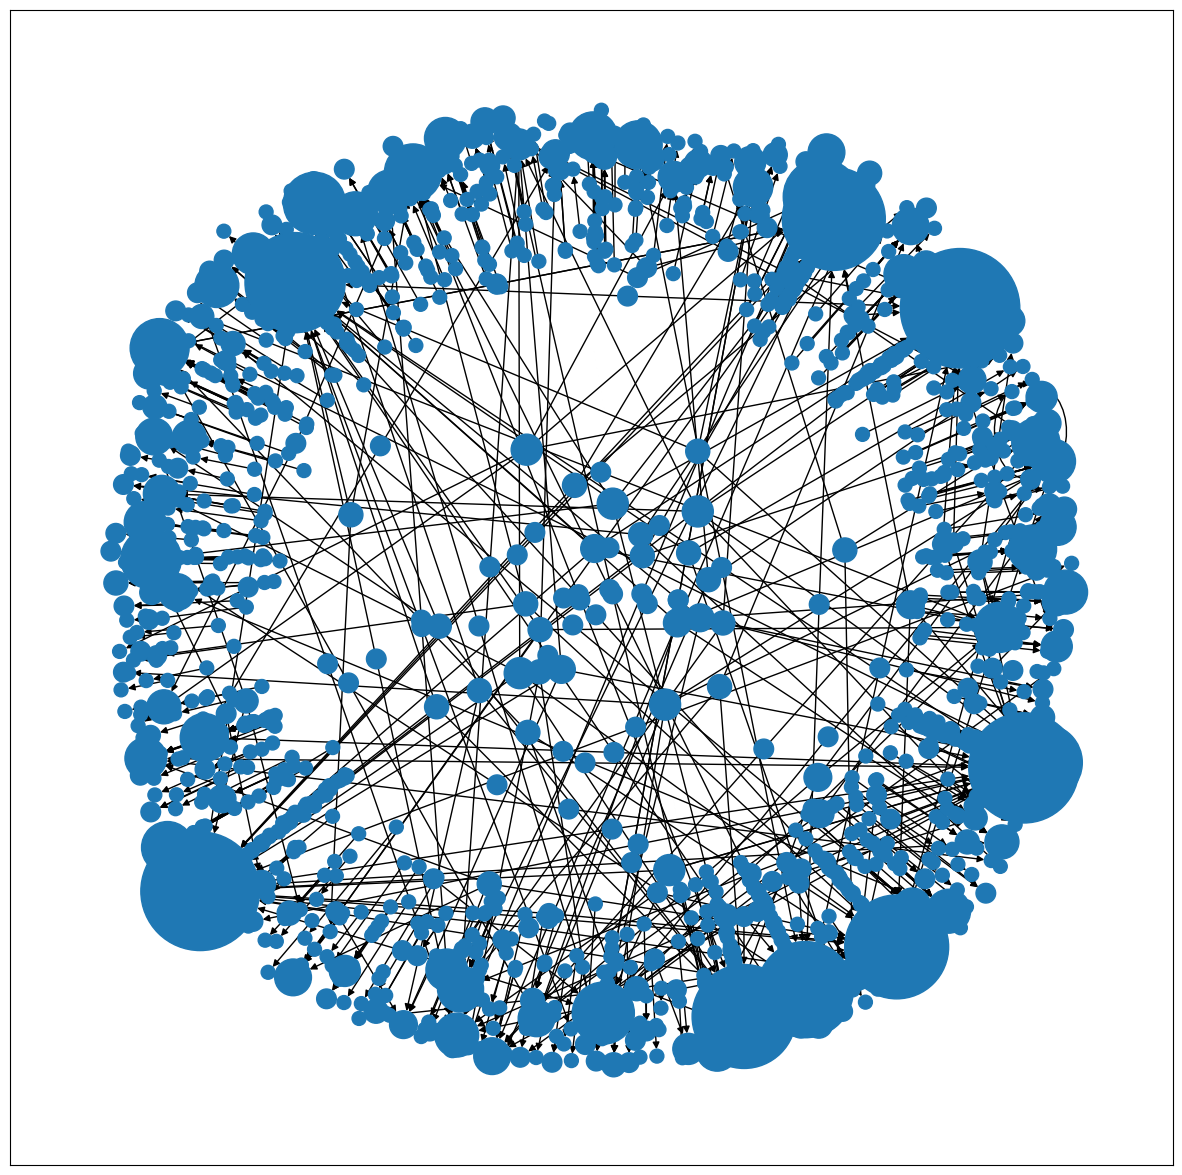

In [21]:
plt.figure(figsize = (15,15))
nx.draw_networkx(Grafo_tweets_ucrainia, pos=pos, node_size=tamano_nodo, with_labels=False)
plt.show()

In [22]:
nodos_a_eliminar = [nodo for nodo, grado in grado_nodos_ucrania if grado <= 2 or grado <= 1 or grado == 0]
nodos_a_eliminar

['Molly v. P.',
 'irene hartmann',
 'wilton correia gomes🇧🇷🇷🇺🇮🇱💪🪖🥾💣',
 'Departamento Rafael Cardoso 🇧🇷🇺🇸🏦',
 'WorldBank',
 'NICOLAS SAAB ORTEGA',
 '@IFEEP',
 'FromPatricia',
 'Ukrainian Cossack🇺🇦🇺🇦',
 'Paul K',
 'Joyreaper',
 'keinen.millimeter.nach.rechts💯DEMOKRATIE 💪🏽🌈💉',
 'Ezra A. Cohen',
 'Winning Fam. Green tickets only',
 'FamTickets',
 'Jimbo 🖕🏼 the SEC',
 "Bronterre O'Brien",
 'Ilw_Ukraine',
 'Nusantara',
 'Catching the Lies / Candidate for Prime Minister',
 'LaylasWorld2',
 'Посольство Німеччини',
 'TheHALOTrust',
 'Rodrigo 🇨🇱🇺🇦 Roto - he/him ه҈̿҈̿҈̿',
 'catherine raats 🇷🇺🇿🇦🇷🇸🇧🇾',
 'jvick60',
 'Hans Moison',
 'ValerieGuillardHein Stands with 🇺🇦 🌻 💛 💙',
 'katherine. 🐘',
 'Margarita K.',
 'Onomatopoeia',
 'LK Tingley',
 'Stesch #Fella 🇺🇦 🇩🇪 🇪🇺 🇺🇳',
 'Cap’n',
 'Pezz',
 'Geekonomicon',
 'rongxiang',
 'Kathleen Marriott 🌻 ☮️',
 'Gabrielle Verdier',
 'BoringOleFart🏴\U000e0067\U000e0062\U000e0073\U000e0063\U000e0074\U000e007f🇺🇦',
 'mpslater',
 'Pablusha ✈️🌏🌵🇺🇦 Pro #NAFO expansion',
 

In [23]:
Grafo_tweets_ucrainia.remove_nodes_from(nodos_a_eliminar)

In [24]:
grados = dict(Grafo_tweets_ucrainia.degree())
grados

{'jensstoltenberg': 1,
 'intermarium24': 3,
 'gahamalian': 0,
 'raging545': 0,
 'UAWeapons': 4,
 'markito0171': 5,
 'SlavaUk30722777': 3,
 'LucindaRhysEvan': 0,
 'HudsonInstitute': 1,
 'kiraincongress': 0,
 'KBoz3': 1,
 'HannaLiubakova': 1,
 'ArmedMaidan': 0,
 'MarkJLindquist': 1,
 'BowesChay': 0,
 'A H': 4,
 'UKRinSWE': 0,
 'JosepBorrellF': 0,
 'Malinka1102': 0,
 'GlasnostGone': 6,
 'Ukraine66251776': 0,
 'NoMoreNATO': 0,
 'Tendar': 8,
 'berlin_bridge': 0,
 'nexta_tv': 5,
 'RageAgainstWar_': 0,
 'tomaburque': 6,
 'Danny Dix': 4,
 'France24_en': 0,
 'uspuk_org': 1,
 'PStyle0ne1': 1,
 'RheinmetallAG': 0,
 'MykhailoNORTH🇨🇦🇺🇦🌻': 0,
 'i24NEWS_EN': 0,
 'BlogUkraine': 3,
 'kardinal691': 0,
 'igorsushko': 0,
 'ZuzanaCaputova': 1,
 'DefactoHumanity': 1,
 'KevinDoyel': 0,
 'oryxspioenkop': 0,
 'Héctor Espina': 4,
 'UNICEF_ECA': 0,
 'USAIDUkraine': 0,
 '🇺🇸JFernandez 🇺🇸🇷🇺 Trump Won!!': 1,
 'Feher_Junior': 3,
 'gymdude_16': 2,
 'TheStudyofWar': 1,
 'Beata Kowalczyk #SilniRazem #ProjektJesień': 3,


In [25]:
pos = nx.circular_layout(Grafo_tweets_ucrainia)
pos

{'jensstoltenberg': array([9.99999997e-01, 3.92983537e-09]),
 'intermarium24': array([0.99893295, 0.04618346]),
 'gahamalian': array([0.99573415, 0.09226837]),
 'raging545': array([0.99041044, 0.13815636]),
 'UAWeapons': array([0.9829731 , 0.18374952]),
 'markito0171': array([0.97343808, 0.22895055]),
 'SlavaUk30722777': array([0.96182567, 0.27366299]),
 'LucindaRhysEvan': array([0.94816065, 0.31779143]),
 'HudsonInstitute': array([0.93247223, 0.36124167]),
 'kiraincongress': array([0.91479385, 0.40392101]),
 'KBoz3': array([0.89516329, 0.44573835]),
 'HannaLiubakova': array([0.87362241, 0.48660445]),
 'ArmedMaidan': array([0.8502171 , 0.52643216]),
 'MarkJLindquist': array([0.82499748, 0.56513637]),
 'BowesChay': array([0.7980172 , 0.60263467]),
 'A H': array([0.76933396, 0.63884676]),
 'UKRinSWE': array([0.7390089 , 0.67369563]),
 'JosepBorrellF': array([0.70710677, 0.70710677]),
 'Malinka1102': array([0.67369562, 0.7390089 ]),
 'GlasnostGone': array([0.63884675, 0.76933396]),
 'Ukra

In [26]:
grado_nodos_ucrania = nx.degree(Grafo_tweets_ucrainia)
tamano_nodo = [grado_nodos_ucrania[nodo] * 500 for nodo in Grafo_tweets_ucrainia.nodes()]
tamano_nodo

[500,
 1500,
 0,
 0,
 2000,
 2500,
 1500,
 0,
 500,
 0,
 500,
 500,
 0,
 500,
 0,
 2000,
 0,
 0,
 0,
 3000,
 0,
 0,
 4000,
 0,
 2500,
 0,
 3000,
 2000,
 0,
 500,
 500,
 0,
 0,
 0,
 1500,
 0,
 0,
 500,
 500,
 0,
 0,
 2000,
 0,
 0,
 500,
 1500,
 1000,
 500,
 1500,
 1000,
 4500,
 500,
 2000,
 2000,
 1500,
 1000,
 0,
 500,
 1000,
 0,
 0,
 0,
 1500,
 0,
 0,
 2000,
 0,
 0,
 0,
 500,
 500,
 0,
 1500,
 0,
 1500,
 0,
 2000,
 500,
 500,
 1000,
 0,
 1000,
 1500,
 0,
 0,
 0,
 0,
 1000,
 0,
 500,
 0,
 1000,
 0,
 1500,
 0,
 1000,
 1000,
 1500,
 0,
 1500,
 1000,
 1000,
 1000,
 1000,
 500,
 2500,
 500,
 0,
 0,
 1500,
 0,
 0,
 0,
 0,
 1500,
 0,
 1000,
 1500,
 0,
 2500,
 500,
 1000,
 0,
 0,
 0,
 0,
 1500,
 1000,
 1500,
 1000,
 0,
 500,
 0,
 0,
 1500,
 0]

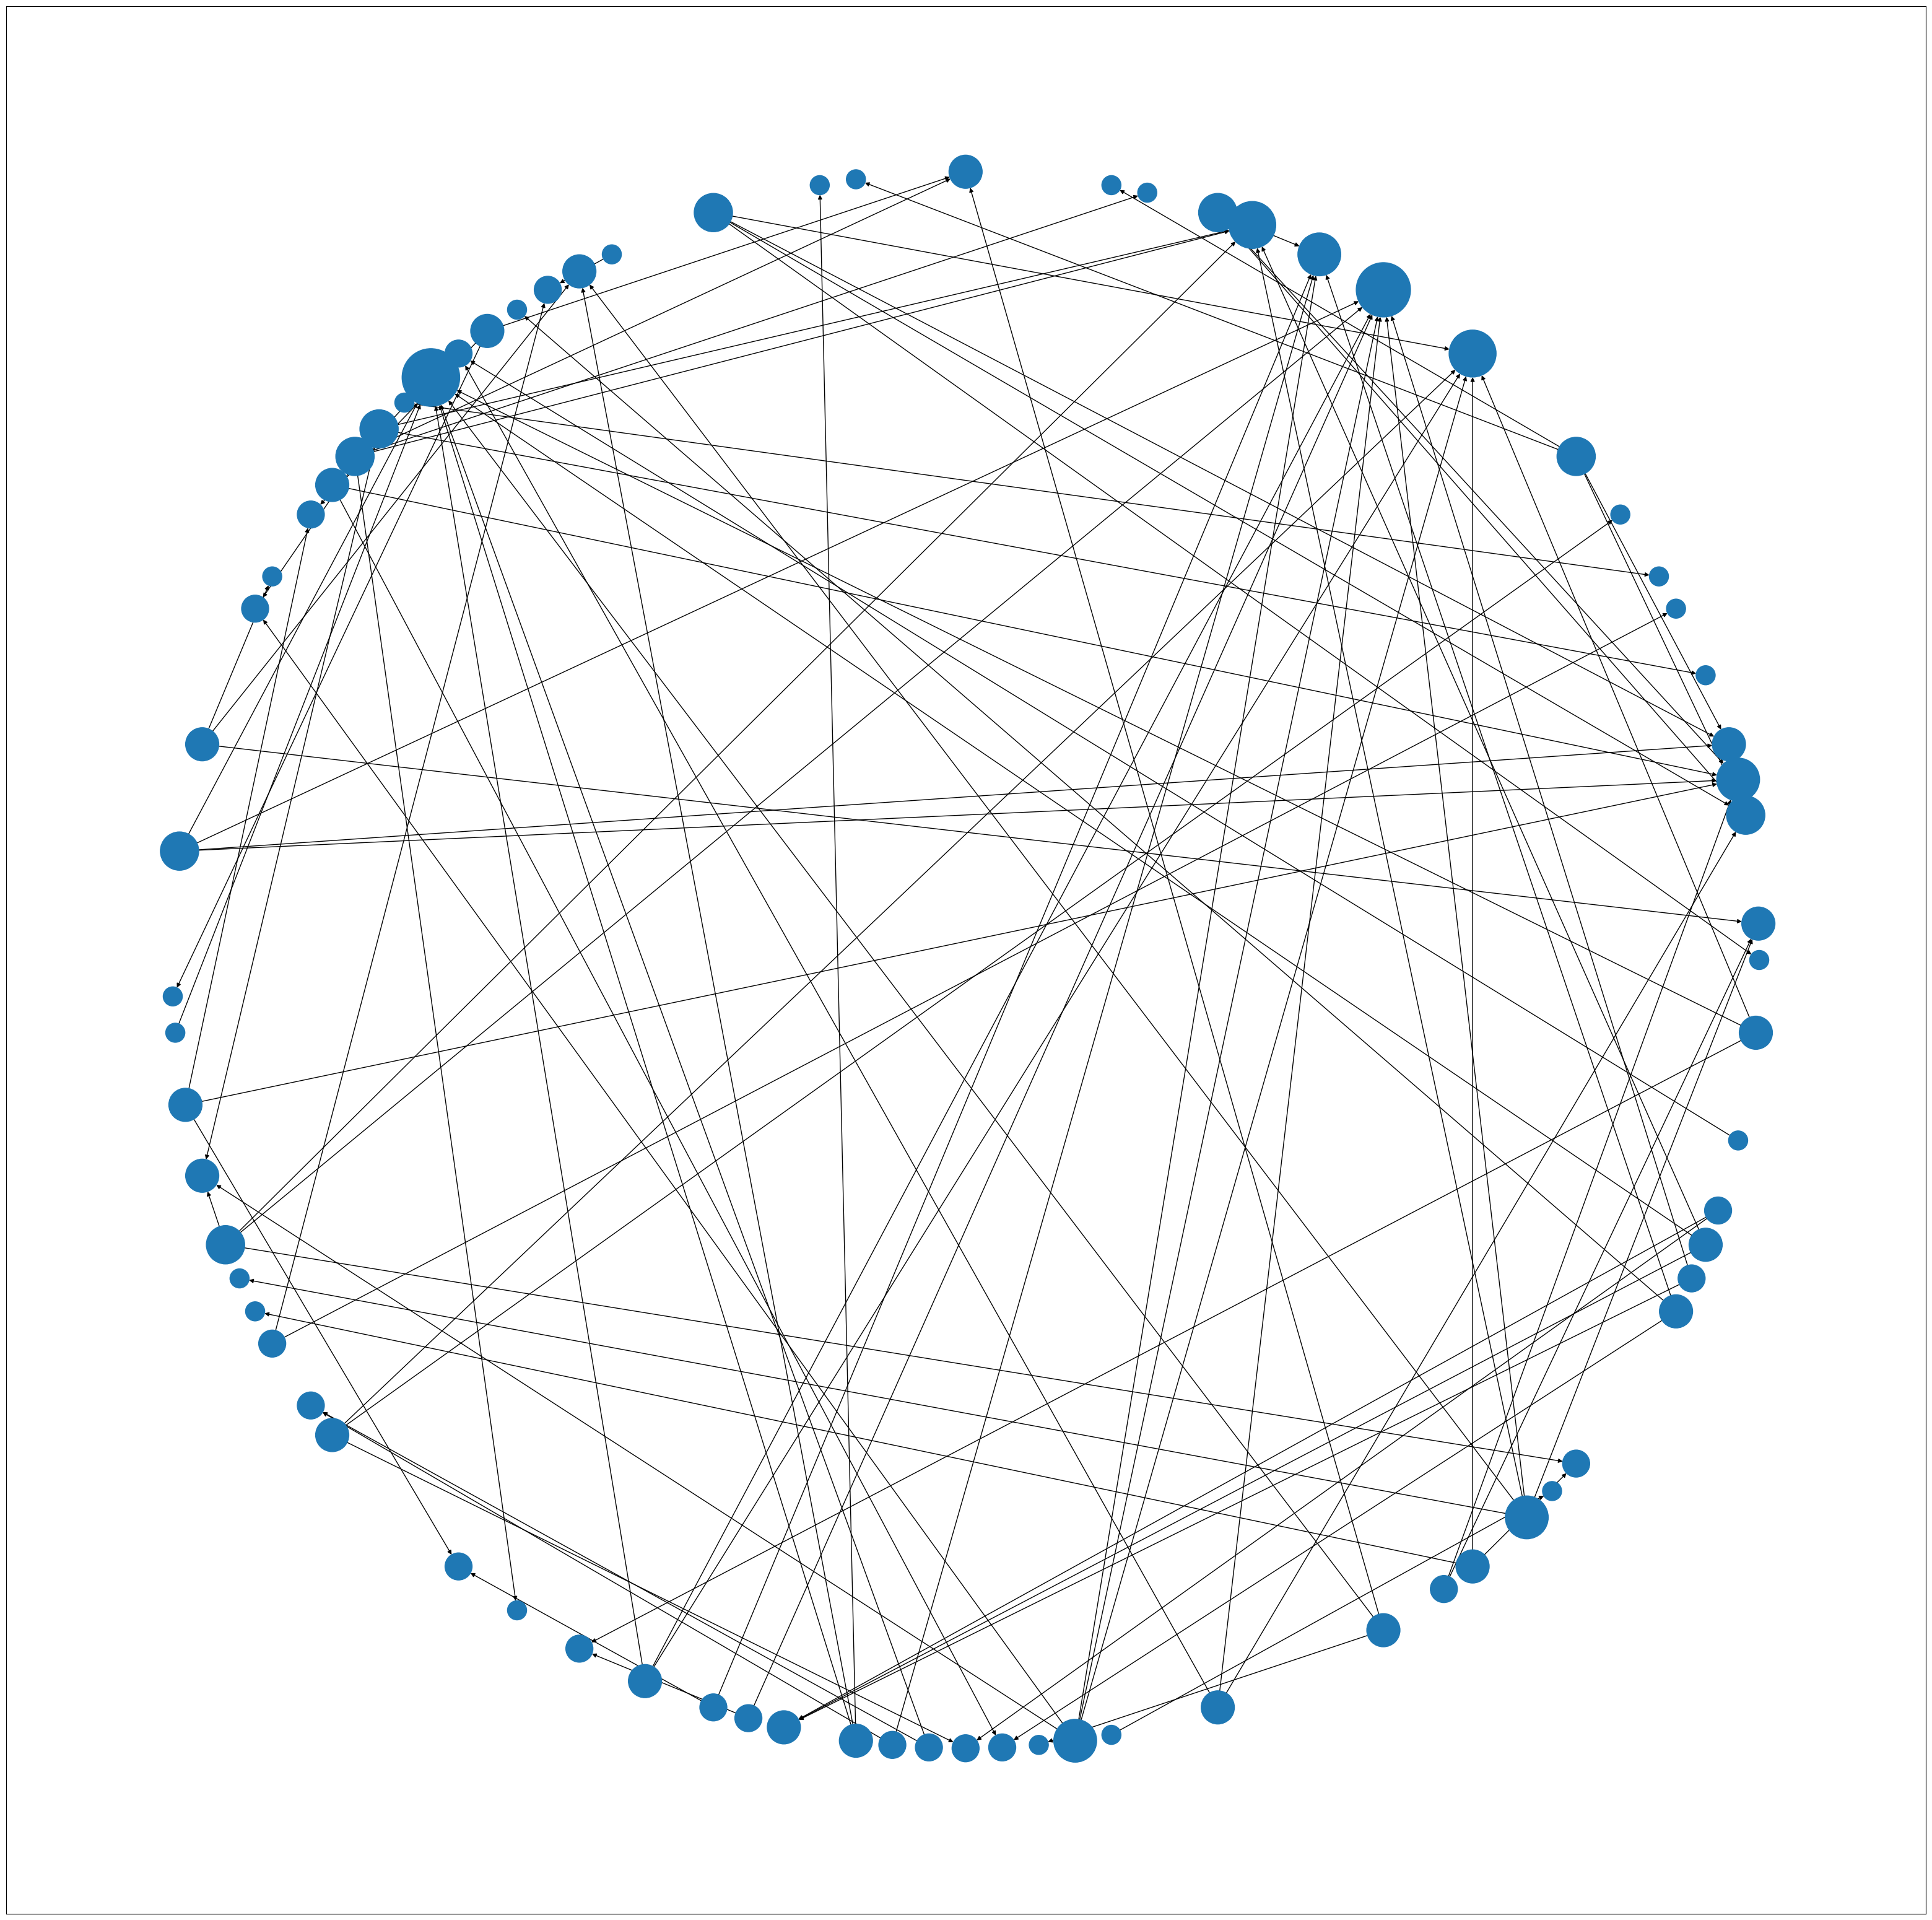

In [27]:
plt.figure(figsize = (40,40))
nx.draw_networkx(Grafo_tweets_ucrainia, pos=pos, node_size=tamano_nodo, with_labels=False)
plt.show()

In [28]:
nx.is_weakly_connected(Grafo_tweets_ucrainia)

False

In [29]:
sccs = list(nx.weakly_connected_components(Grafo_tweets_ucrainia))
sccs

[{'A H',
  'BearGrylls',
  'Beata Kowalczyk #SilniRazem #ProjektJesień',
  'BernieFireball 💥🇺🇦',
  'BjørnB - 🇺🇦❤️',
  'BlogUkraine',
  'Danny Dix',
  'David Isaksen',
  'DefactoHumanity',
  'Dr. GalaxyBrain™️ 🇨🇦🇺🇦',
  'Feher_Junior',
  'Gabriel Maur🇷🇴',
  'Gala Ryzhkova',
  'GlasnostGone',
  'Heidi Bilas @HeidiBilas@mstdn.party',
  'HeliosRunner',
  'Heroiam_Slava',
  'HudsonInstitute',
  'Héctor Espina',
  'Jochen Krause',
  'John Andreu',
  'John G Mandziuk',
  'John Ramos-Henderson',
  'Jorge R.',
  'Kelene K💉💉💉🇫🇷😷pour 🇺🇦',
  'KyivPost',
  'LinkeviciusL',
  'MaksymLozOfficial',
  'MarkJLindquist',
  'Matt_VanDyke',
  'MinisterBoomer',
  'Muresaan.Andreei',
  'NatalkaKyiv',
  'News UCanUse 🇺🇦✍️ ☕️🍺🇺🇦',
  'Oleksandr',
  'OstapYarysh',
  'PStyle0ne1',
  'Roadster1978',
  'Rod Stephens',
  'Sagakino1',
  'SlavaUk30722777',
  'Tendar',
  'TheDeadDistrict',
  'TheStudyofWar',
  'Toni0000🌻🇺🇦🌬🔥🔥🧨💥🇷🇺💥',
  'UAWeapons',
  'UAarmy_animals',
  'UKikaski',
  'UkraineNewsLive',
  'VinokurDima',
  

In [30]:
G_scc = Grafo_tweets_ucrainia.subgraph(max(sccs, key=len))
G_scc

In [31]:
grados = dict(G_scc.degree())
grados

{'jensstoltenberg': 1,
 'PStyle0ne1': 1,
 'Héctor Espina': 4,
 'BlogUkraine': 3,
 'Will Clicked': 3,
 'Heroiam_Slava': 3,
 'Oleksandr': 4,
 'Feher_Junior': 3,
 'Viv Anderson': 3,
 'TheStudyofWar': 1,
 'HeliosRunner': 2,
 'John Andreu': 1,
 'Jochen Krause': 3,
 'BearGrylls': 1,
 'Gala Ryzhkova': 3,
 'WarFrontline': 1,
 'GlasnostGone': 6,
 'canog 🇺🇦 #StandsWithUkraine aka @canog@mastodon': 3,
 'NatalkaKyiv': 9,
 'intermarium24': 3,
 'MaksymLozOfficial': 2,
 'uspuk_org': 1,
 'UAWeapons': 4,
 'Heidi Bilas @HeidiBilas@mstdn.party': 3,
 'MarkJLindquist': 1,
 'MinisterBoomer': 1,
 'cristian gontar': 2,
 'Muresaan.Andreei': 2,
 'Roadster1978': 3,
 'David Isaksen': 3,
 'tomaburque': 6,
 'Kelene K💉💉💉🇫🇷😷pour 🇺🇦': 3,
 'Danny Dix': 4,
 'John Ramos-Henderson': 5,
 'John G Mandziuk': 3,
 'BjørnB - 🇺🇦❤️': 2,
 'BernieFireball 💥🇺🇦': 2,
 'SlavaUk30722777': 3,
 'OstapYarysh': 2,
 'TheDeadDistrict': 2,
 'DefactoHumanity': 1,
 'LinkeviciusL': 2,
 'UkraineNewsLive': 1,
 'UKikaski': 2,
 'Matt_VanDyke': 1,
 'D

In [39]:
pos = nx.spring_layout(G_scc)
pos

{'jensstoltenberg': array([0.35798295, 0.86806797]),
 'PStyle0ne1': array([0.77331363, 0.35162093]),
 'Héctor Espina': array([-0.15354975,  0.16558631]),
 'BlogUkraine': array([ 0.29170982, -1.        ]),
 'Will Clicked': array([ 0.1647144, -0.1247297]),
 'Heroiam_Slava': array([ 0.90053052, -0.26752267]),
 'Oleksandr': array([0.45727717, 0.42183657]),
 'Feher_Junior': array([ 0.32527793, -0.88540596]),
 'Viv Anderson': array([0.42974042, 0.18671704]),
 'TheStudyofWar': array([ 0.56691054, -0.85343789]),
 'HeliosRunner': array([ 0.88445335, -0.03386162]),
 'John Andreu': array([-0.984816  , -0.13096481]),
 'Jochen Krause': array([-0.25628759, -0.51563514]),
 'BearGrylls': array([-0.78886516, -0.65439817]),
 'Gala Ryzhkova': array([-0.34006512,  0.26670637]),
 'WarFrontline': array([ 0.10697963, -0.96555603]),
 'GlasnostGone': array([0.11004509, 0.92639125]),
 'canog 🇺🇦 #StandsWithUkraine aka @canog@mastodon': array([-0.26819067,  0.34269808]),
 'NatalkaKyiv': array([ 0.77538061, -0.700

In [40]:
grado_nodos_ucrania = nx.degree(G_scc)
tamano_nodo = [grado_nodos_ucrania[nodo] * 500 for nodo in G_scc.nodes()]
tamano_nodo

[500,
 500,
 2000,
 1500,
 1500,
 1500,
 2000,
 1500,
 1500,
 500,
 1000,
 500,
 1500,
 500,
 1500,
 500,
 3000,
 1500,
 4500,
 1500,
 1000,
 500,
 2000,
 1500,
 500,
 500,
 1000,
 1000,
 1500,
 1500,
 3000,
 1500,
 2000,
 2500,
 1500,
 1000,
 1000,
 1500,
 1000,
 1000,
 500,
 1000,
 500,
 1000,
 500,
 1000,
 2000,
 2500,
 2000,
 1000,
 500,
 1000,
 500,
 500,
 2500,
 1000,
 4000,
 1500,
 2000,
 1500,
 1000,
 1000,
 2500,
 1500,
 500,
 2000,
 1500]

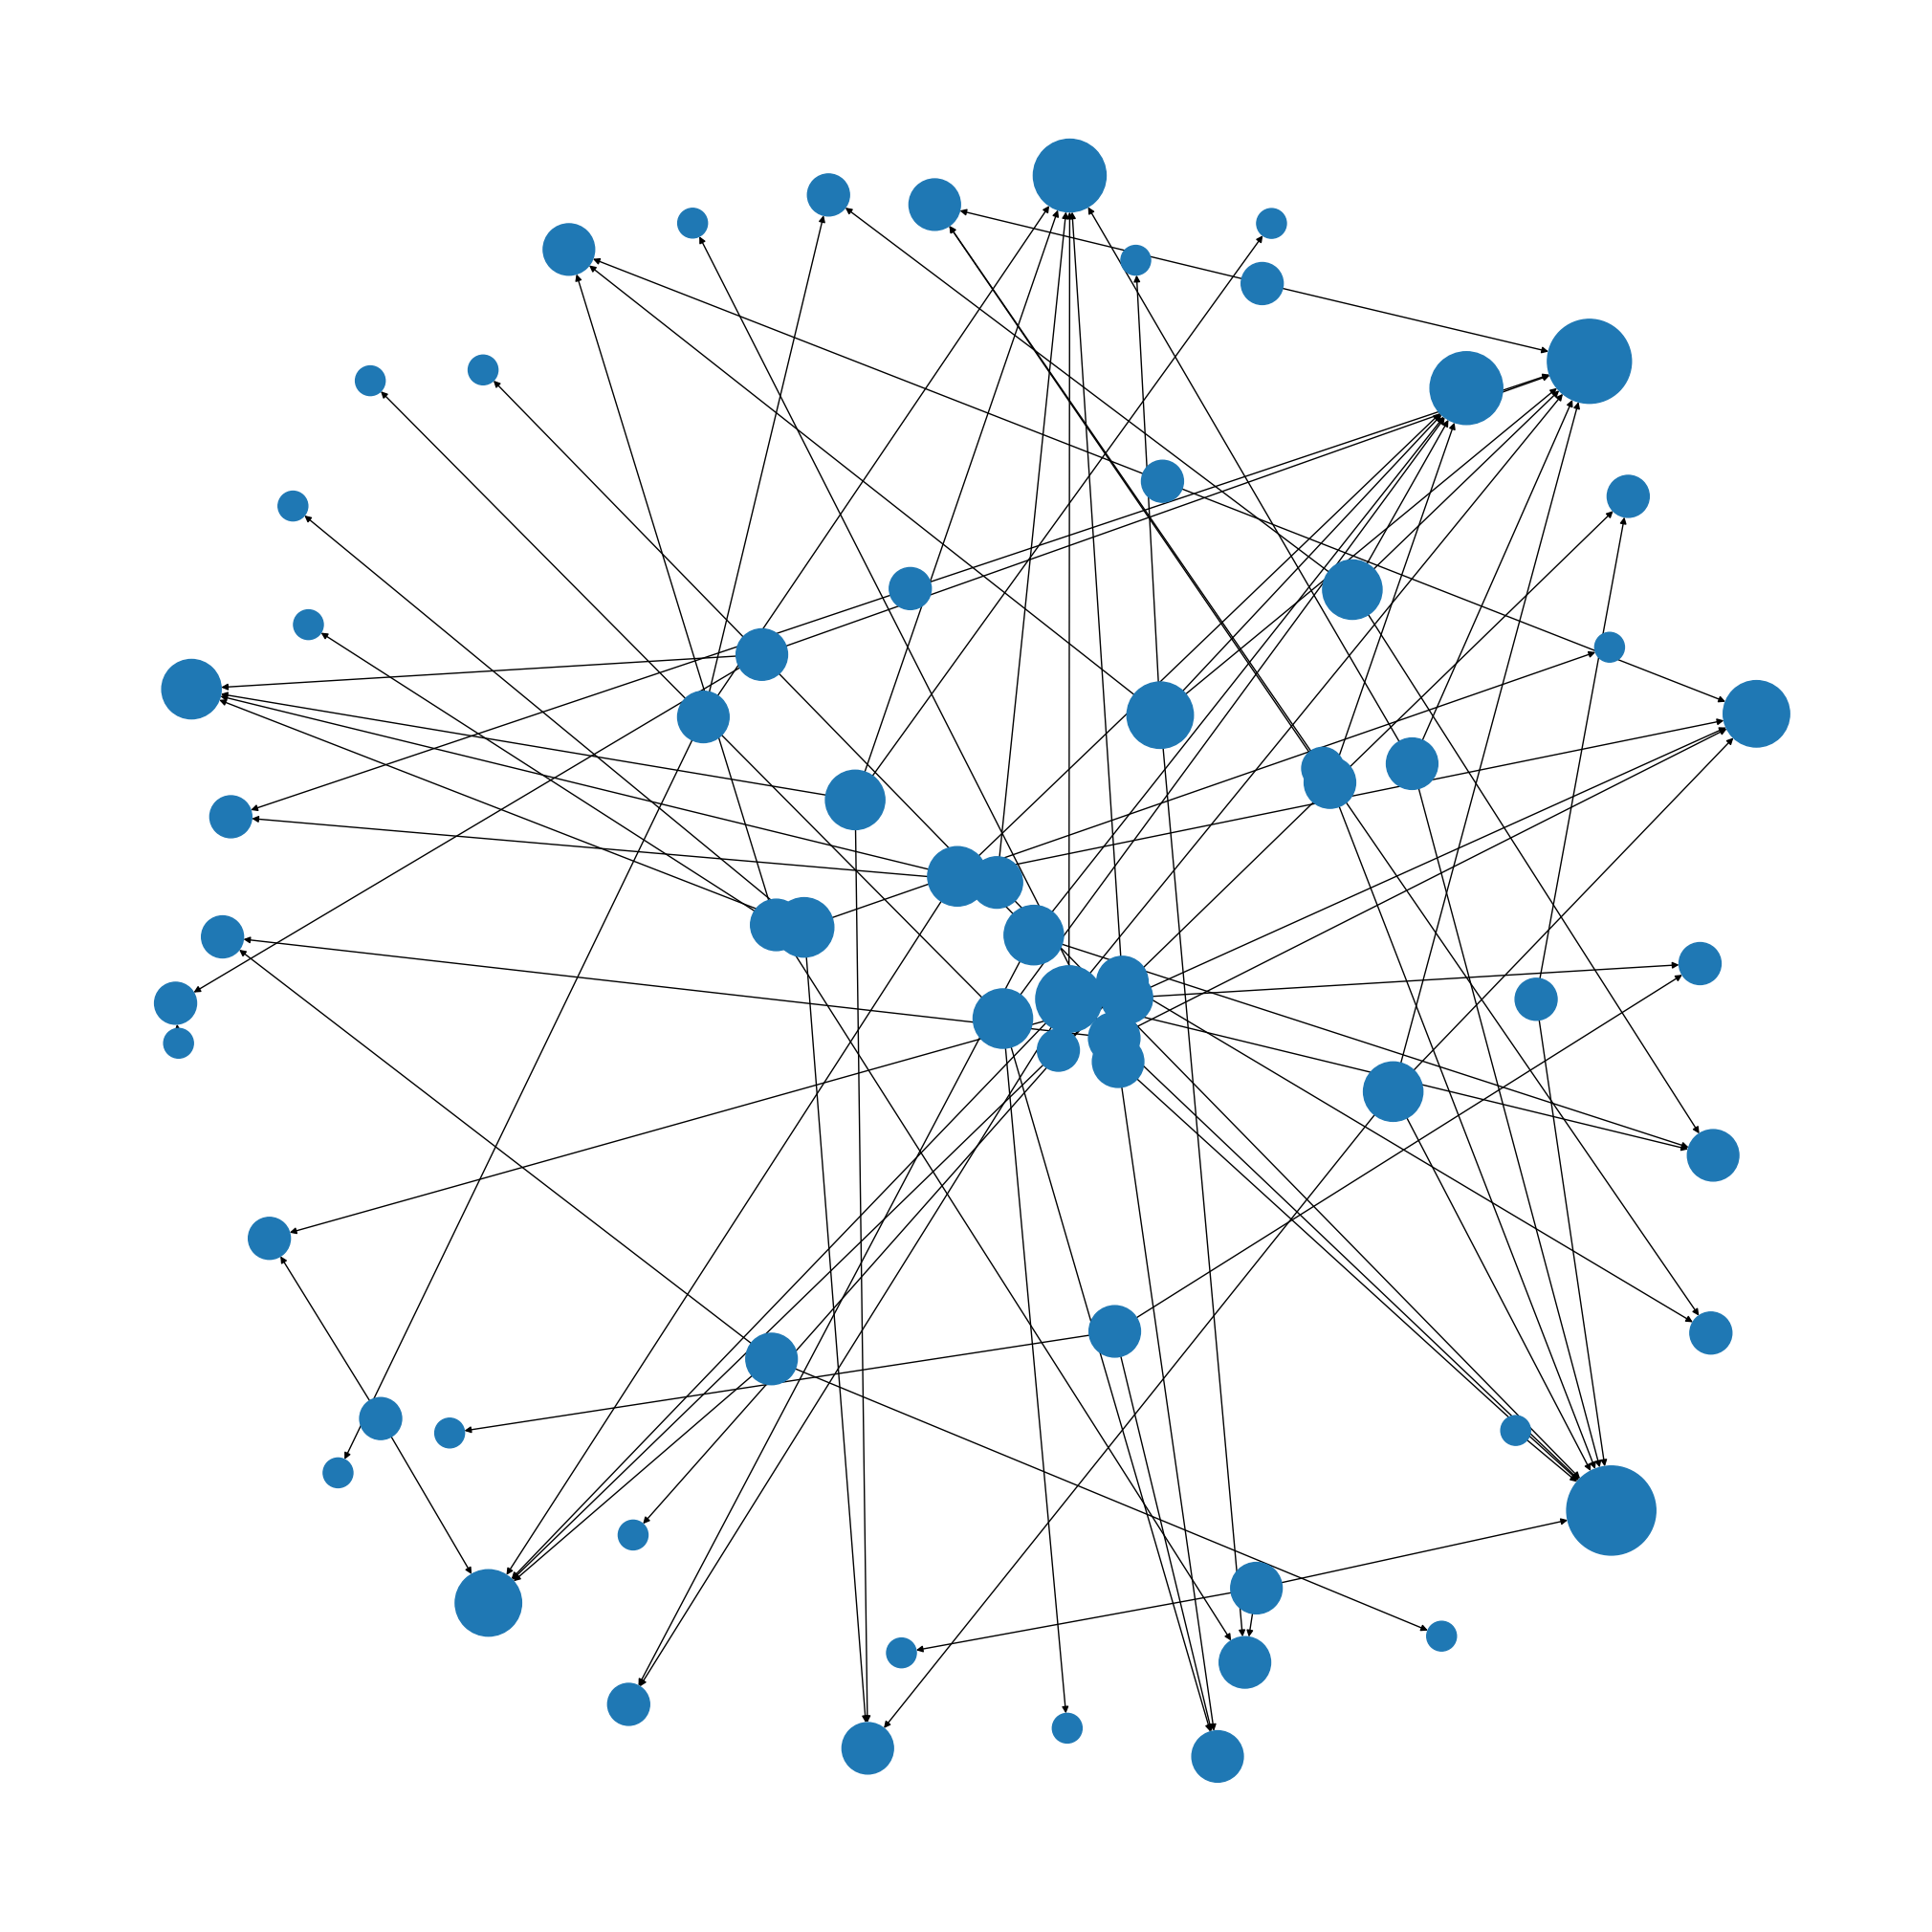

In [50]:
plt.figure(figsize=(20, 20))
nx.draw(G_scc, pos=pos, node_size=tamano_nodo, with_labels=False)
plt.show()

In [ ]:
df_ukraine_dataset_en_filtrado_sin_lista.to_csv("retweets_mentions.csv")

In [ ]:
import json


datos = G_scc.edges()


nombre_archivo = 'grafo.json'


datos_json = [{'origen': origen, 'destino': destino} for origen, destino in datos]


with open(nombre_archivo, 'w', encoding='utf-8') as archivo:
    json.dump(datos_json, archivo, ensure_ascii=False)

print("El grafo se ha guardado exitosamente en el archivo JSON.")

In [51]:
from community import community_louvain
G_undirected = G_scc.to_undirected()
partition = community_louvain.best_partition(G_undirected)
partition

{'jensstoltenberg': 6,
 'PStyle0ne1': 6,
 'Héctor Espina': 6,
 'BlogUkraine': 2,
 'Will Clicked': 4,
 'Heroiam_Slava': 5,
 'Oleksandr': 5,
 'Feher_Junior': 7,
 'Viv Anderson': 3,
 'TheStudyofWar': 4,
 'HeliosRunner': 4,
 'John Andreu': 1,
 'Jochen Krause': 4,
 'BearGrylls': 5,
 'Gala Ryzhkova': 5,
 'WarFrontline': 2,
 'GlasnostGone': 0,
 'canog 🇺🇦 #StandsWithUkraine aka @canog@mastodon': 1,
 'NatalkaKyiv': 0,
 'intermarium24': 7,
 'MaksymLozOfficial': 1,
 'uspuk_org': 2,
 'UAWeapons': 6,
 'Heidi Bilas @HeidiBilas@mstdn.party': 3,
 'MarkJLindquist': 3,
 'MinisterBoomer': 2,
 'cristian gontar': 4,
 'Muresaan.Andreei': 7,
 'Roadster1978': 3,
 'David Isaksen': 0,
 'tomaburque': 5,
 'Kelene K💉💉💉🇫🇷😷pour 🇺🇦': 4,
 'Danny Dix': 6,
 'John Ramos-Henderson': 5,
 'John G Mandziuk': 0,
 'BjørnB - 🇺🇦❤️': 0,
 'BernieFireball 💥🇺🇦': 3,
 'SlavaUk30722777': 6,
 'OstapYarysh': 1,
 'TheDeadDistrict': 4,
 'DefactoHumanity': 7,
 'LinkeviciusL': 5,
 'UkraineNewsLive': 7,
 'UKikaski': 5,
 'Matt_VanDyke': 2,
 'D

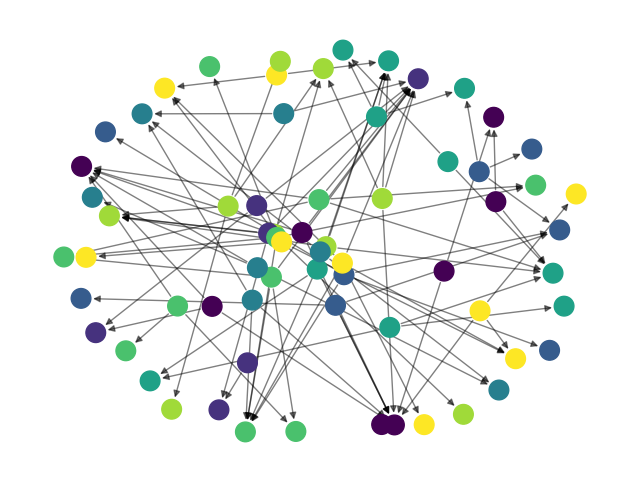

In [52]:
pos = nx.spring_layout(G_scc)
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G_scc, pos, node_color=list(partition.values()), cmap='viridis', node_size=200)
nx.draw_networkx_edges(G_scc, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
# Obtener la información del grafo y las comunidades en un diccionario
graph_data = {
    'nodes': [{'id': str(node)} for node in G_scc.nodes()],
    'edges': [{'source': str(edge[0]), 'target': str(edge[1])} for edge in G_scc.edges()],
    'communities': [{'node': str(node), 'community': str(partition[node])} for node in G_scc.nodes()]
}

In [ ]:
# Guardar el diccionario en un archivo JSON
with open('grafoComunidades.json', 'w') as file:
    json.dump(graph_data, file)